# Problem Statement Definition

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features.

# Load libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Set Options
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557,1239,33.00,14.00,21.00
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,1400,1400,1.00,2.00,2.00
2,3.00,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.00,1,1900,1,1900,1900,1.00,0.00,0.00
3,3.00,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.00,6,6900,5,600,1800,1.00,1.00,2.00
4,3.00,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.00,3,3900,3,1100,1600,6.00,6.00,9.00


# Basic Data Exploration

In [4]:
df.shape

(197428, 14)

In [5]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.00,196433.00,197428.00,197428.00,197428.00,197428.00,197428.00,181166.00,181166.00,181166.00
mean,2.98,2.88,3.20,2682.33,2.67,686.22,1159.59,44.81,41.74,58.05
std,1.52,1.50,2.67,1823.09,1.63,522.04,558.41,34.53,32.15,52.66
min,1.00,1.00,1.00,0.00,1.00,-86.00,0.00,-4.00,-5.00,-6.00
25%,2.00,1.00,2.00,1400.00,1.00,299.00,800.00,17.00,15.00,17.00
50%,3.00,3.00,3.00,2200.00,2.00,595.00,1095.00,37.00,34.00,41.00
75%,4.00,4.00,4.00,3395.00,3.00,949.00,1395.00,65.00,62.00,85.00
max,6.00,7.00,411.00,27100.00,20.00,14700.00,14700.00,171.00,154.00,285.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [7]:
df.describe(include=object)

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


# Checking null values

In [8]:
(df.isna().sum() / df.shape[0])*100

market_id                  0.50
created_at                 0.00
actual_delivery_time       0.00
store_id                   0.00
store_primary_category     2.41
order_protocol             0.50
total_items                0.00
subtotal                   0.00
num_distinct_items         0.00
min_item_price             0.00
max_item_price             0.00
total_onshift_partners     8.24
total_busy_partners        8.24
total_outstanding_orders   8.24
dtype: float64

There are various ways to treat null values in our data:
1. Drop rows with null values.
2. Impute them using mean/median or mode if categorical variable.
3. Impute it smartly using the data from other columns.

In [9]:
df.dropna()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557,1239,33.00,14.00,21.00
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,1400,1400,1.00,2.00,2.00
8,2.00,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.00,4,4771,3,820,1604,8.00,6.00,18.00
14,1.00,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.00,1,1525,1,1525,1525,5.00,6.00,8.00
15,1.00,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.00,2,3620,2,1425,2195,5.00,5.00,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.00,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.00,3,1389,3,345,649,17.00,17.00,23.00
197424,1.00,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.00,6,3010,4,405,825,12.00,11.00,14.00
197425,1.00,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.00,5,1836,3,300,399,39.00,41.00,40.00
197426,1.00,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.00,1,1175,1,535,535,7.00,7.00,12.00


If we drop null values we lose about 8% of the data, which is a lot and hence let's not do that an impute the mean values.

In [10]:
df['market_id'].value_counts().index[0]

2.0

In [11]:
df['store_primary_category'].fillna(df['store_primary_category'].mode()[0], inplace=True)

In [12]:
df['order_protocol'].fillna(df['order_protocol'].mode()[0], inplace=True)

In [13]:
df['total_onshift_partners']

0        33.00
1         1.00
2         1.00
3         1.00
4         6.00
          ... 
197423   17.00
197424   12.00
197425   39.00
197426    7.00
197427   20.00
Name: total_onshift_partners, Length: 197428, dtype: float64

In [14]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [15]:
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.dayofweek

In [16]:
df.groupby('created_hour')['total_onshift_partners'].transform('median')

0        20.00
1        27.00
2        36.00
3        27.00
4        65.00
          ... 
197423   25.00
197424   25.00
197425   42.00
197426   12.00
197427   29.00
Name: total_onshift_partners, Length: 197428, dtype: float64

In [17]:
df.groupby(by = ['created_hour', 'created_dayofweek']).transform('median')

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,3.00,2015-02-06 22:05:08.000,2015-02-06 22:43:36.000,3.00,2.00,1682.50,2.00,550.00,949.00,19.00,15.00,17.00
1,3.00,2015-02-10 21:00:15.000,2015-02-10 21:24:34.000,3.00,2.00,1622.50,2.00,650.00,975.00,25.00,22.00,24.00
2,3.00,2015-02-05 20:05:47.500,2015-02-05 20:42:51.500,3.00,2.00,1670.00,2.00,600.00,984.50,39.00,36.00,46.00
3,3.00,2015-02-10 21:00:15.000,2015-02-10 21:24:34.000,3.00,2.00,1622.50,2.00,650.00,975.00,25.00,22.00,24.00
4,3.00,2015-02-08 02:08:09.000,2015-02-08 02:54:54.500,3.00,3.00,2845.00,3.00,595.00,1199.00,67.00,64.00,96.00
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3.00,2015-02-03 00:57:42.500,2015-02-03 01:57:25.000,3.00,3.00,2281.00,2.00,550.00,1022.50,18.00,18.00,20.00
197424,3.00,2015-02-06 00:04:46.000,2015-02-06 00:39:50.000,3.00,3.00,2285.00,2.00,599.00,1095.00,23.00,18.00,20.00
197425,3.00,2015-02-07 04:06:03.000,2015-02-07 04:52:10.000,3.00,3.00,2385.00,2.00,600.00,1150.00,51.00,51.00,77.00
197426,3.00,2015-02-08 18:08:56.000,2015-02-08 18:46:15.500,3.00,3.00,1920.00,2.00,500.00,995.00,13.00,13.00,14.00


In [18]:
def fill(df, value):
    df[value] = df[value].fillna(df.groupby(by = ['created_hour', 'created_dayofweek'])[value].transform('median'))

In [19]:
values = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
for value in values:
    fill(df, value)

In [20]:
df.isna().sum()

market_id                   987
created_at                    0
actual_delivery_time          7
store_id                      0
store_primary_category        0
order_protocol                0
total_items                   0
subtotal                      0
num_distinct_items            0
min_item_price                0
max_item_price                0
total_onshift_partners        0
total_busy_partners           0
total_outstanding_orders      0
created_hour                  0
created_dayofweek             0
dtype: int64

In [21]:
df['market_id'].fillna(df['market_id'].value_counts().idxmax(), inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 197428 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    197428 non-null  object        
 5   order_protocol            197428 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    197428 non-null  float64       
 12  to

In [23]:
df.dropna(inplace=True)

In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_dayofweek
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557,1239,33.00,14.00,21.00,22,4
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,1400,1400,1.00,2.00,2.00,21,1
2,3.00,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.00,1,1900,1,1900,1900,1.00,0.00,0.00,20,3
3,3.00,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.00,6,6900,5,600,1800,1.00,1.00,2.00,21,1
4,3.00,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.00,3,3900,3,1100,1600,6.00,6.00,9.00,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197416,1.00,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.00,3,1389,3,345,649,17.00,17.00,23.00,0,1
197417,1.00,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.00,6,3010,4,405,825,12.00,11.00,14.00,0,4
197418,1.00,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.00,5,1836,3,300,399,39.00,41.00,40.00,4,5
197419,1.00,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.00,1,1175,1,535,535,7.00,7.00,12.00,18,6


In [26]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
created_hour                0
created_dayofweek           0
dtype: int64

We use the smart apporach to fill nan values in few columns and use the mode to fill a few nans. The rows with nan present in actual_delivery_time column are dropped because it would be used in creating the target variable. 

# Feature Engineering

In [27]:
# Creating target variable
df['delivery_time_mins'] = ((df['actual_delivery_time'] - df['created_at']).dt.seconds) / 60

In [28]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_dayofweek,delivery_time_mins
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557,1239,33.00,14.00,21.00,22,4,62.98
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,1400,1400,1.00,2.00,2.00,21,1,67.07
2,3.00,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.00,1,1900,1,1900,1900,1.00,0.00,0.00,20,3,29.68
3,3.00,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.00,6,6900,5,600,1800,1.00,1.00,2.00,21,1,51.25
4,3.00,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.00,3,3900,3,1100,1600,6.00,6.00,9.00,2,6,39.83


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197421 entries, 0 to 197420
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 197421 non-null  float64       
 1   created_at                197421 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197421 non-null  object        
 4   store_primary_category    197421 non-null  object        
 5   order_protocol            197421 non-null  float64       
 6   total_items               197421 non-null  int64         
 7   subtotal                  197421 non-null  int64         
 8   num_distinct_items        197421 non-null  int64         
 9   min_item_price            197421 non-null  int64         
 10  max_item_price            197421 non-null  int64         
 11  total_onshift_partners    197421 non-null  float64       
 12  to

# Univariate Analysis

In [30]:
df['market_id'].value_counts(normalize=True)

2.00   0.28
4.00   0.24
1.00   0.19
3.00   0.12
5.00   0.09
6.00   0.07
Name: market_id, dtype: float64

<AxesSubplot:xlabel='market_id', ylabel='count'>

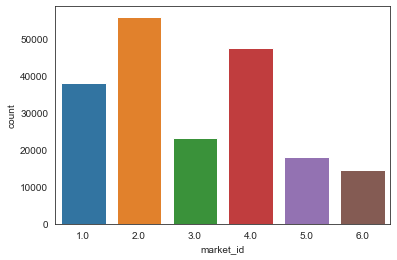

In [31]:
sns.countplot(df['market_id'])

Observation: About 28% of the restaurants lie in market 2, whereas only 7% lie in market 6.

In [32]:
 df['created_at'].min(), df['created_at'].max()

(Timestamp('2014-10-19 05:24:15'), Timestamp('2015-02-18 06:00:44'))

In [33]:
df['created_dayofweek'].value_counts(normalize=True)

5   0.17
6   0.17
4   0.14
0   0.14
3   0.13
2   0.12
1   0.12
Name: created_dayofweek, dtype: float64

<AxesSubplot:xlabel='created_dayofweek', ylabel='count'>

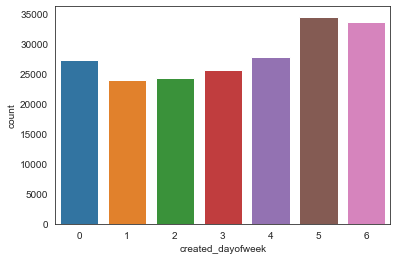

In [34]:
sns.countplot(df['created_dayofweek'])

The day of the week with Monday=0, Sunday=6.

Observation: Max no. of orders are placed on weekends.

In [35]:
df['created_hour'].value_counts(normalize=True)

2    0.19
1    0.14
3    0.14
20   0.08
4    0.08
19   0.07
0    0.06
21   0.06
22   0.04
23   0.04
5    0.04
18   0.03
17   0.02
16   0.01
6    0.01
15   0.00
14   0.00
7    0.00
8    0.00
Name: created_hour, dtype: float64

<AxesSubplot:xlabel='created_hour', ylabel='count'>

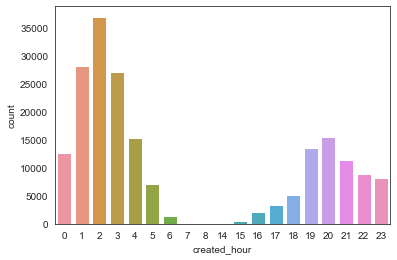

In [36]:
sns.countplot(df['created_hour'])

Observation: The orders in an hour follow a bi-modal distribution.

In [37]:
df['store_id'].value_counts()

d43ab110ab2489d6b9b2caa394bf920f    937
757b505cfd34c64c85ca5b5690ee5293    863
faacbcd5bf1d018912c116bf2783e9a1    814
cfecdb276f634854f3ef915e2e980c31    765
45c48cce2e2d7fbdea1afc51c7c6ad26    721
                                   ... 
adad0f2b196a1ed3e3b9d9025c397132      1
2e6d9c6052e99fcdfa61d9b9da273ca2      1
25daeb9b3072e9c53f66a2196a92a011      1
55285adfd78a019a3245917649e29b3c      1
df263d996281d984952c07998dc54358      1
Name: store_id, Length: 6743, dtype: int64

Observation: There are total 6743 unique stores and max occurence of a store is 937 in the dataset of about 1.8 lakh rows and hence I think we should be able to ignore this variable in our modeling.

In [38]:
df['store_primary_category'].value_counts(normalize=True)

american            0.12
pizza               0.09
mexican             0.09
burger              0.06
sandwich            0.05
                    ... 
lebanese            0.00
belgian             0.00
indonesian          0.00
chocolate           0.00
alcohol-plus-food   0.00
Name: store_primary_category, Length: 74, dtype: float64

<AxesSubplot:ylabel='store_primary_category'>

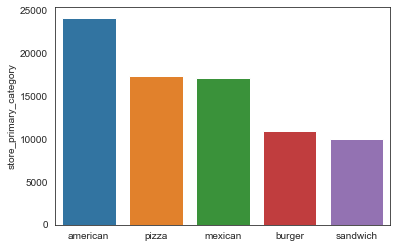

In [39]:
sns.barplot(x=df['store_primary_category'].value_counts().head().index, y=df['store_primary_category'].value_counts().head())

Observation: About 12 % restaurants in the dataset are american, followed by pizza and mexican 9% each.

In [40]:
df['order_protocol'].value_counts(normalize=True)

1.00   0.28
3.00   0.27
5.00   0.22
2.00   0.12
4.00   0.10
6.00   0.00
7.00   0.00
Name: order_protocol, dtype: float64

<AxesSubplot:xlabel='order_protocol', ylabel='count'>

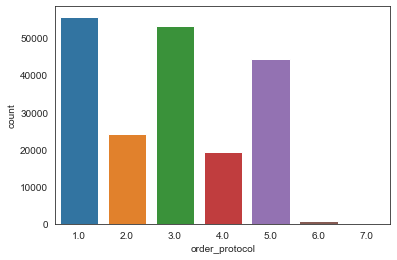

In [41]:
sns.countplot(df['order_protocol'])

order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)

In [42]:
df['total_items'].min(), df['total_items'].max()

(1, 411)

In [43]:
df['total_items'].value_counts(normalize=True)

2     0.28
1     0.21
3     0.20
4     0.13
5     0.07
6     0.04
7     0.03
8     0.02
9     0.01
10    0.01
11    0.00
12    0.00
13    0.00
14    0.00
15    0.00
16    0.00
17    0.00
18    0.00
19    0.00
20    0.00
21    0.00
22    0.00
25    0.00
24    0.00
26    0.00
28    0.00
23    0.00
27    0.00
30    0.00
29    0.00
34    0.00
42    0.00
35    0.00
33    0.00
31    0.00
40    0.00
48    0.00
36    0.00
32    0.00
37    0.00
39    0.00
38    0.00
41    0.00
50    0.00
49    0.00
45    0.00
411   0.00
47    0.00
59    0.00
51    0.00
57    0.00
56    0.00
44    0.00
43    0.00
84    0.00
64    0.00
66    0.00
Name: total_items, dtype: float64

In [44]:
df['num_distinct_items'].value_counts()

2     59173
1     49838
3     41839
4     23185
5     11772
6      5695
7      2917
8      1419
9       734
10      389
11      233
12      105
13       60
14       35
15       13
16        6
18        3
17        2
19        2
20        1
Name: num_distinct_items, dtype: int64

<AxesSubplot:xlabel='num_distinct_items', ylabel='count'>

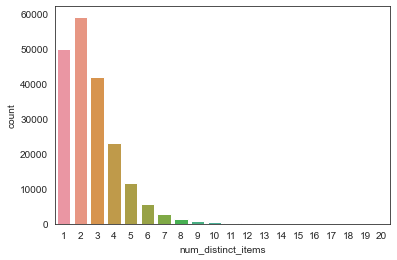

In [45]:
sns.countplot(df['num_distinct_items'])

<AxesSubplot:xlabel='min_item_price', ylabel='Count'>

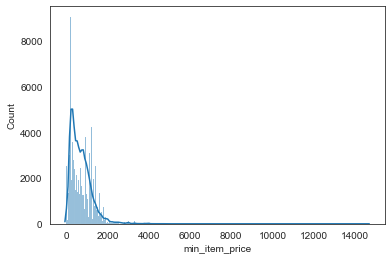

In [46]:
sns.histplot(df['min_item_price'], kde=True)

In [47]:
df['min_item_price' ].min(), df['min_item_price' ].max()

(-86, 14700)

<AxesSubplot:xlabel='max_item_price', ylabel='Count'>

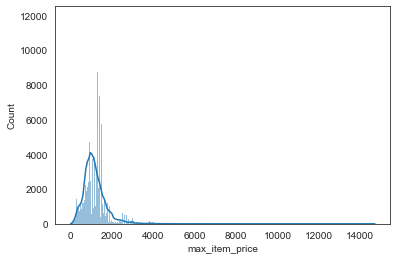

In [48]:
sns.histplot(df['max_item_price'], kde=True)

In [49]:
df['max_item_price' ].min(), df['max_item_price' ].max()

(0, 14700)

In [50]:
df['total_onshift_partners'].value_counts()

0.00      3615
25.00     3438
18.00     3183
19.00     3131
17.00     3093
          ... 
163.00       1
165.00       1
-3.00        1
171.00       1
168.00       1
Name: total_onshift_partners, Length: 178, dtype: int64

<AxesSubplot:xlabel='total_onshift_partners', ylabel='Count'>

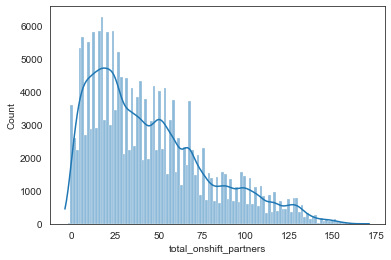

In [51]:
sns.histplot(df['total_onshift_partners'], kde=True)

In [52]:
df['total_busy_partners'].value_counts()

0.00      4173
13.00     3360
18.00     3359
10.00     3357
24.00     3329
          ... 
-4.00        2
153.00       1
154.00       1
149.00       1
-5.00        1
Name: total_busy_partners, Length: 159, dtype: int64

<AxesSubplot:xlabel='total_busy_partners', ylabel='Count'>

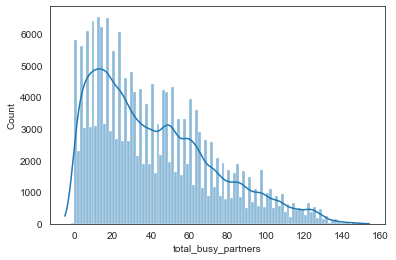

In [53]:
sns.histplot(df['total_busy_partners'], kde=True)

In [54]:
df['total_outstanding_orders'].value_counts()

0.00      4111
10.00     2969
14.00     2900
20.00     2834
9.00      2810
          ... 
264.00       1
277.00       1
268.00       1
285.00       1
260.00       1
Name: total_outstanding_orders, Length: 282, dtype: int64

<AxesSubplot:xlabel='total_outstanding_orders', ylabel='Count'>

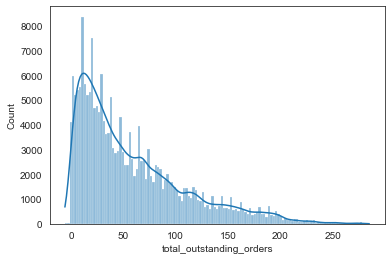

In [55]:
sns.histplot(df['total_outstanding_orders'], kde=True)

Observation: Total onshift partners, total busy partners and total outstanding orders seem to follow similar distribution which is right-skewed in nature.

<AxesSubplot:xlabel='delivery_time_mins', ylabel='Density'>

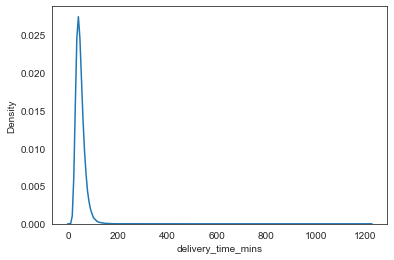

In [56]:
sns.kdeplot(df['delivery_time_mins'])

Observation: The target variable follows a highly right-skewed distribution.

In [57]:
df['delivery_time_mins'].min(),df['delivery_time_mins'].max()

(1.6833333333333333, 1221.3666666666666)

# Outlier Detection

In [58]:
num = df.dtypes[(df.dtypes=='int64') | (df.dtypes=='float64')].index.values

In [59]:
df.dtypes[(df.dtypes=='int64') | (df.dtypes=='float64')].index.values

array(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_hour', 'created_dayofweek',
       'delivery_time_mins'], dtype=object)

In [60]:
num

array(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_hour', 'created_dayofweek',
       'delivery_time_mins'], dtype=object)

In [61]:
len(num)

13

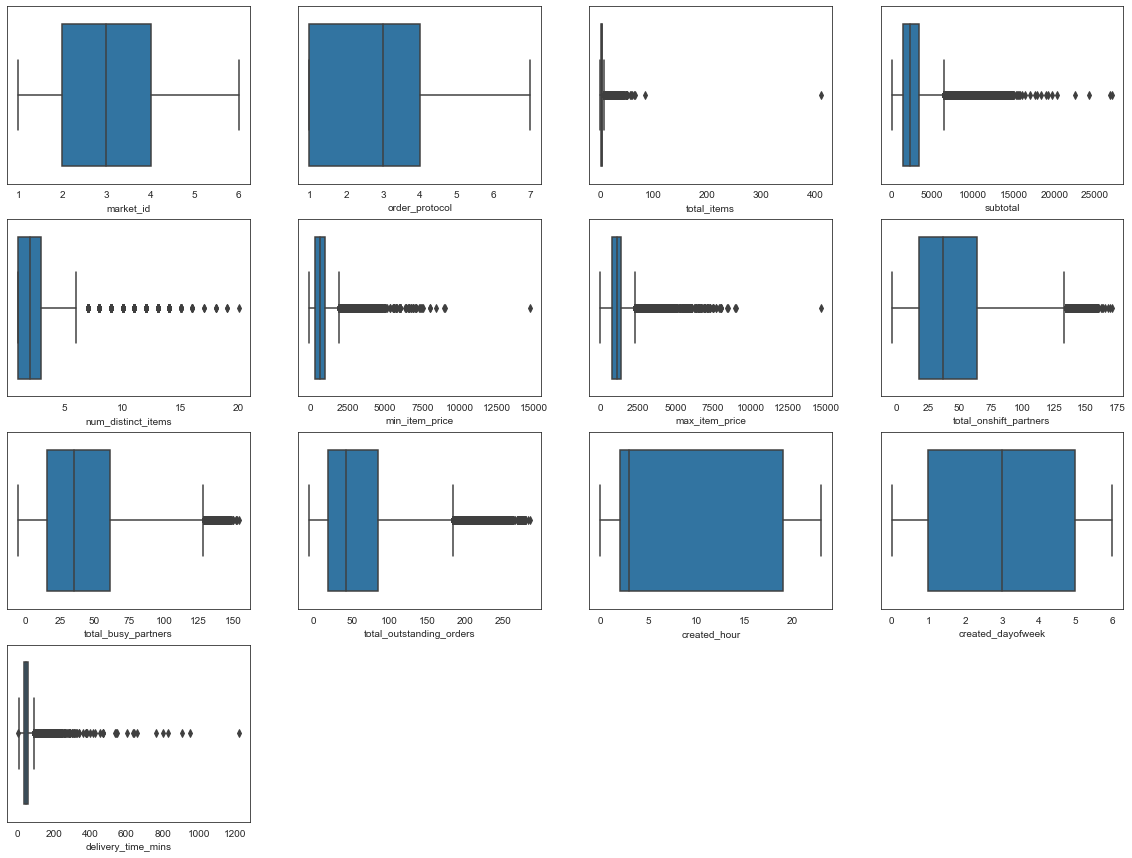

In [62]:
plt.figure(figsize=(20,15))
for c in range (0,len(num)):
    plt.subplot(4,4,c+1)
    sns.boxplot(data = df, x=num[c])

In [63]:
df_copy = df.copy()

In [64]:
# This function is going to determine outliers based on IQR.
# Once outliers are identified, they will be removed from dataset.
def remove_outliers(data,column):
    first_quartile = data[column].quantile(0.25)
    third_quartile = data[column].quantile(0.75)
    IQR = third_quartile - first_quartile
    hg_boundry = third_quartile + (1.5*IQR)
    lw_boundry = first_quartile - (1.5*IQR)
    data.drop( data[(data[column] > hg_boundry) | (data[column] < lw_boundry) ].index, axis=0, inplace=True)

In [65]:
for i in range(len(num)):
    remove_outliers(df_copy,num[i])

In [66]:
df_copy

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_dayofweek,delivery_time_mins
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557,1239,33.00,14.00,21.00,22,4,62.98
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,1400,1400,1.00,2.00,2.00,21,1,67.07
2,3.00,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.00,1,1900,1,1900,1900,1.00,0.00,0.00,20,3,29.68
4,3.00,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.00,3,3900,3,1100,1600,6.00,6.00,9.00,2,6,39.83
5,3.00,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,american,1.00,3,5000,3,1500,1900,2.00,2.00,2.00,20,2,38.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197416,1.00,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.00,3,1389,3,345,649,17.00,17.00,23.00,0,1,65.12
197417,1.00,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.00,6,3010,4,405,825,12.00,11.00,14.00,0,4,56.38
197418,1.00,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.00,5,1836,3,300,399,39.00,41.00,40.00,4,5,50.13
197419,1.00,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.00,1,1175,1,535,535,7.00,7.00,12.00,18,6,65.12


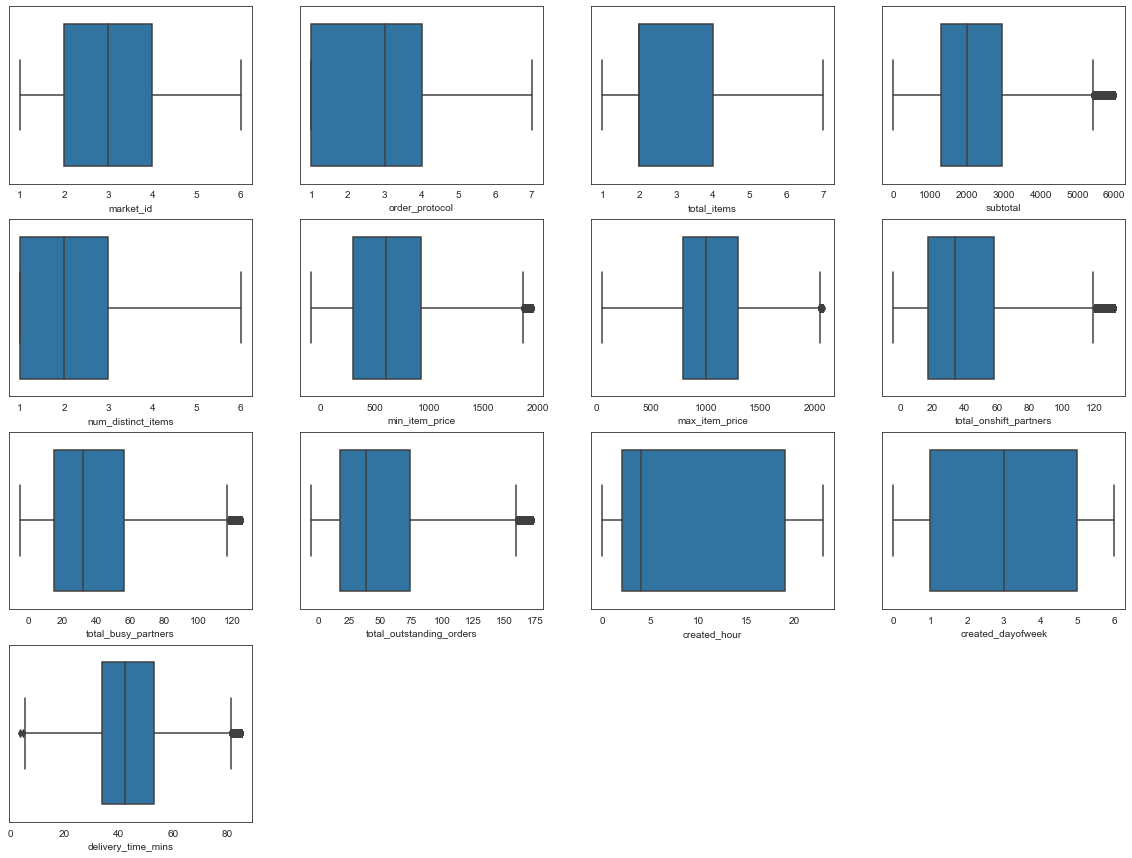

In [67]:
plt.figure(figsize=(20,15))
for c in range (0,len(num)):
    plt.subplot(4,4,c+1)
    sns.boxplot(data = df_copy, x=num[c])

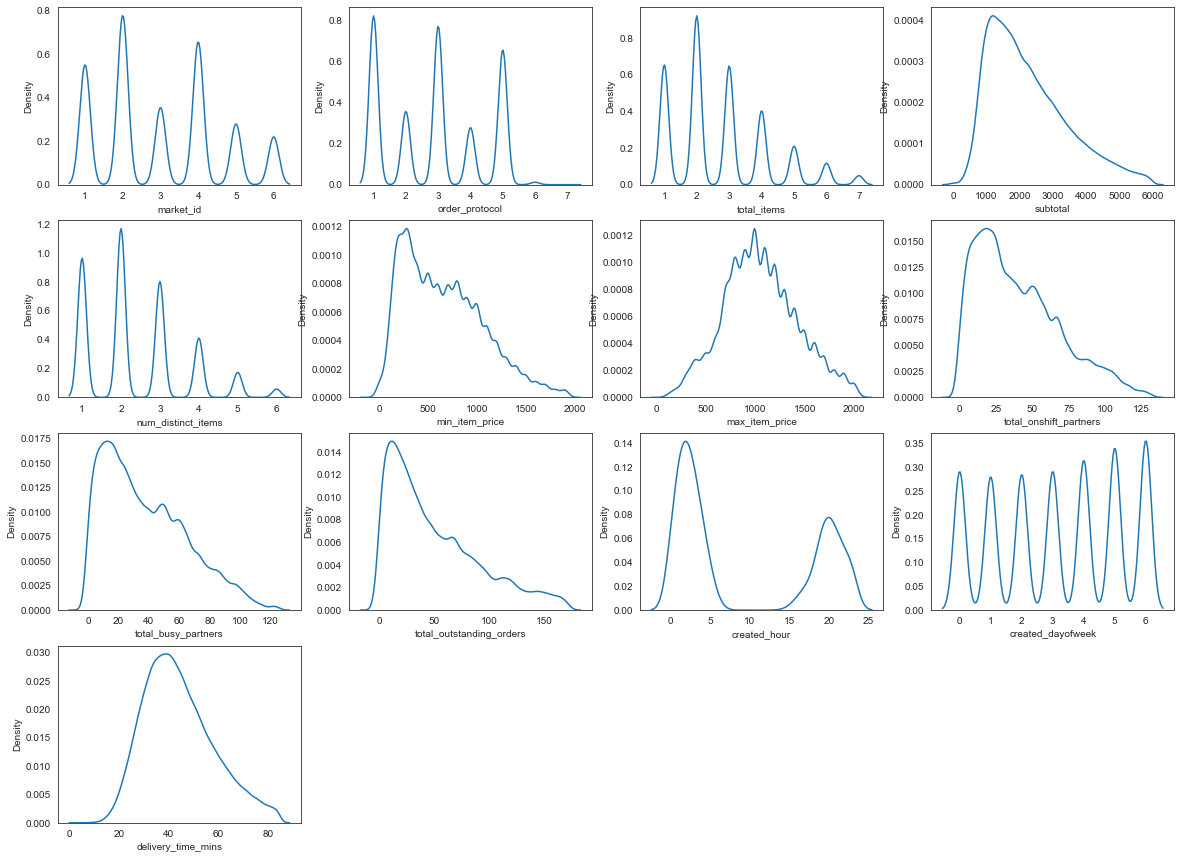

In [68]:
plt.figure(figsize=(20,15))
for c in range (0,len(num)):
    plt.subplot(4,4,c+1)
    sns.kdeplot(data = df_copy, x=num[c])

If we remove outliers using 1.5IQR method, we are losing almost 40k rows from the dataset, which implies we are losing a lot of information. And hence let's not remove using 1.5 IQR.

Let us try to run the baseline model on the data with outliers so that we get a breif understanding of how the model would perform in presence of all the data that we have.

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [70]:
df.drop(columns=['created_at', 'actual_delivery_time','store_id'], inplace=True)

In [71]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_dayofweek,delivery_time_mins
0,1.00,american,1.00,4,3441,4,557,1239,33.00,14.00,21.00,22,4,62.98
1,2.00,mexican,2.00,1,1900,1,1400,1400,1.00,2.00,2.00,21,1,67.07
2,3.00,american,1.00,1,1900,1,1900,1900,1.00,0.00,0.00,20,3,29.68
3,3.00,american,1.00,6,6900,5,600,1800,1.00,1.00,2.00,21,1,51.25
4,3.00,american,1.00,3,3900,3,1100,1600,6.00,6.00,9.00,2,6,39.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197416,1.00,fast,4.00,3,1389,3,345,649,17.00,17.00,23.00,0,1,65.12
197417,1.00,fast,4.00,6,3010,4,405,825,12.00,11.00,14.00,0,4,56.38
197418,1.00,fast,4.00,5,1836,3,300,399,39.00,41.00,40.00,4,5,50.13
197419,1.00,sandwich,1.00,1,1175,1,535,535,7.00,7.00,12.00,18,6,65.12


In [72]:
le = LabelEncoder()
df['store_primary_category'] = le.fit_transform(df['store_primary_category'])

In [73]:
x = df.drop(['delivery_time_mins'], axis=1)
y=df['delivery_time_mins']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [74]:
baseline_regressor = RandomForestRegressor(random_state=0)
 
baseline_regressor.fit(X_train, y_train)

y_pred = baseline_regressor.predict(X_test)
print("RMSE : ", mse(y_test, y_pred)**0.5)
print("MAPE : ", mape(y_test, y_pred))

RMSE :  17.680060158036323
MAPE :  0.2728192388420478


The MAPE of the model doesn't look appealing. Hence let's try few other techniques.

In [75]:
fi = pd.DataFrame()
fi['features'] = df.columns[:-1]
fi['importance'] = baseline_regressor.feature_importances_
fi.sort_values(by='importance', ascending=False)

,features,importance
4,subtotal,0.15
10,total_outstanding_orders,0.12
8,total_onshift_partners,0.11
7,max_item_price,0.10
6,min_item_price,0.10
11,created_hour,0.08
1,store_primary_category,0.07
9,total_busy_partners,0.07
12,created_dayofweek,0.06
2,order_protocol,0.04


In [76]:
from sklearn.decomposition import PCA

cs = [2,4,6,8,10,12]
info = []
for i in cs:
    pca = PCA(n_components=i)
    vis = pca.fit_transform(x_scaled)
    info.append(pca.explained_variance_ratio_.sum())

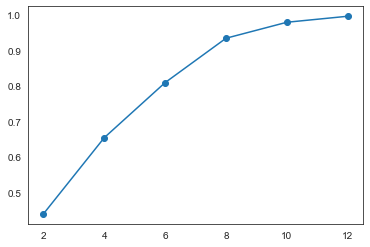

In [77]:
plt.plot(cs, info, '-o')

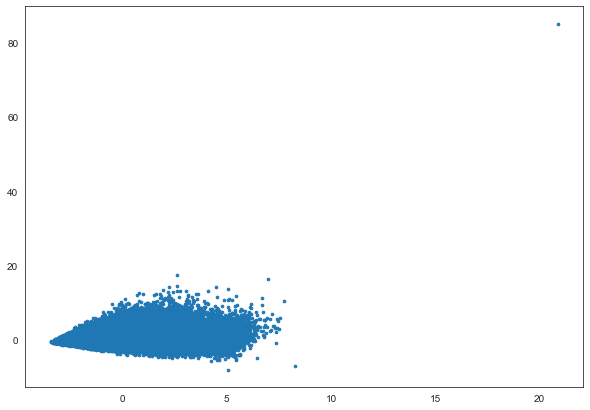

In [78]:
from sklearn.decomposition import PCA

plt.figure(figsize=(10,7))
pca = PCA(n_components=2)
vis = pca.fit_transform(x_scaled)
plt.scatter(vis[:,0], vis[:,1], s=7)

In [79]:
pca = PCA(n_components=8)

Xpca = pca.fit_transform(x_scaled)
y = df['delivery_time_mins']

X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.2, random_state=0)

baseline_regressor = RandomForestRegressor(random_state=0)
 
baseline_regressor.fit(X_train, y_train)

y_pred = baseline_regressor.predict(X_test)
print("RMSE : ", mse(y_test, y_pred)**0.5)
print("MAPE : ", mape(y_test, y_pred))

RMSE :  18.845510972608785
MAPE :  0.29933102666415295


PCA didn't really help in improving our model performance and hence let's try to remove outliers first with a different method.

In [80]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

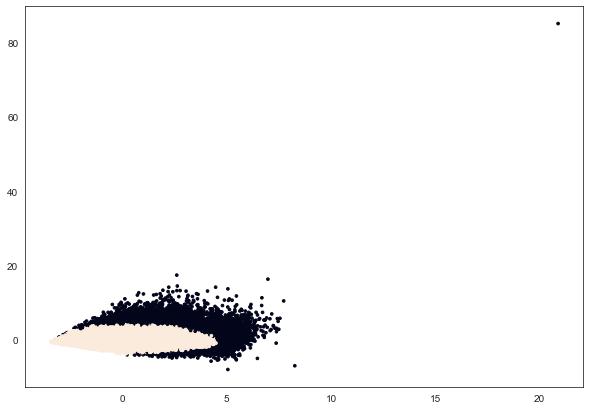

In [81]:
plt.figure(figsize=(10,7))
is_outlier = IsolationForest(contamination = 0.05, random_state=0, n_estimators=100).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

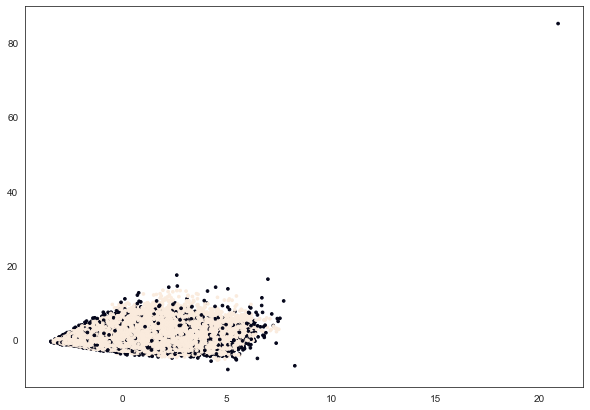

In [82]:
plt.figure(figsize=(10,7))
is_outlier = LocalOutlierFactor(n_neighbors=5, contamination=0.10).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

Let us train a model on non-outliers data we got from LOF method using contamination=10

In [83]:
df.shape[0] - df.shape[0] * 0.1

177678.9

In [84]:
is_outlier

array([ 1,  1, -1, ...,  1,  1, -1])

In [85]:
df[is_outlier==1]

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_dayofweek,delivery_time_mins
0,1.00,4,1.00,4,3441,4,557,1239,33.00,14.00,21.00,22,4,62.98
1,2.00,47,2.00,1,1900,1,1400,1400,1.00,2.00,2.00,21,1,67.07
3,3.00,4,1.00,6,6900,5,600,1800,1.00,1.00,2.00,21,1,51.25
4,3.00,4,1.00,3,3900,3,1100,1600,6.00,6.00,9.00,2,6,39.83
5,3.00,4,1.00,3,5000,3,1500,1900,2.00,2.00,2.00,20,2,38.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197414,1.00,28,4.00,2,979,2,145,339,67.00,60.00,86.00,3,4,67.30
197415,1.00,28,4.00,7,2445,3,145,585,23.00,24.00,24.00,19,5,39.40
197416,1.00,28,4.00,3,1389,3,345,649,17.00,17.00,23.00,0,1,65.12
197418,1.00,28,4.00,5,1836,3,300,399,39.00,41.00,40.00,4,5,50.13


In [86]:
df_nooutliers = df[is_outlier==1]
df_nooutliers.reset_index(inplace=True,drop=True)

In [87]:
df_nooutliers

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_dayofweek,delivery_time_mins
0,1.00,4,1.00,4,3441,4,557,1239,33.00,14.00,21.00,22,4,62.98
1,2.00,47,2.00,1,1900,1,1400,1400,1.00,2.00,2.00,21,1,67.07
2,3.00,4,1.00,6,6900,5,600,1800,1.00,1.00,2.00,21,1,51.25
3,3.00,4,1.00,3,3900,3,1100,1600,6.00,6.00,9.00,2,6,39.83
4,3.00,4,1.00,3,5000,3,1500,1900,2.00,2.00,2.00,20,2,38.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177674,1.00,28,4.00,2,979,2,145,339,67.00,60.00,86.00,3,4,67.30
177675,1.00,28,4.00,7,2445,3,145,585,23.00,24.00,24.00,19,5,39.40
177676,1.00,28,4.00,3,1389,3,345,649,17.00,17.00,23.00,0,1,65.12
177677,1.00,28,4.00,5,1836,3,300,399,39.00,41.00,40.00,4,5,50.13


In [88]:
x = df_nooutliers.drop(['delivery_time_mins'], axis=1)
y=df_nooutliers['delivery_time_mins']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [89]:
baseline_regressor = RandomForestRegressor(random_state=0)
 
baseline_regressor.fit(X_train, y_train)

y_pred = baseline_regressor.predict(X_test)
print("RMSE : ", mse(y_test, y_pred)**0.5)
print("MAPE : ", mape(y_test, y_pred))

RMSE :  18.12149271033784
MAPE :  0.27140392295575483


The accuracy slightly improved but let us try some other method outlier removal. Let us try using 3IQR range 

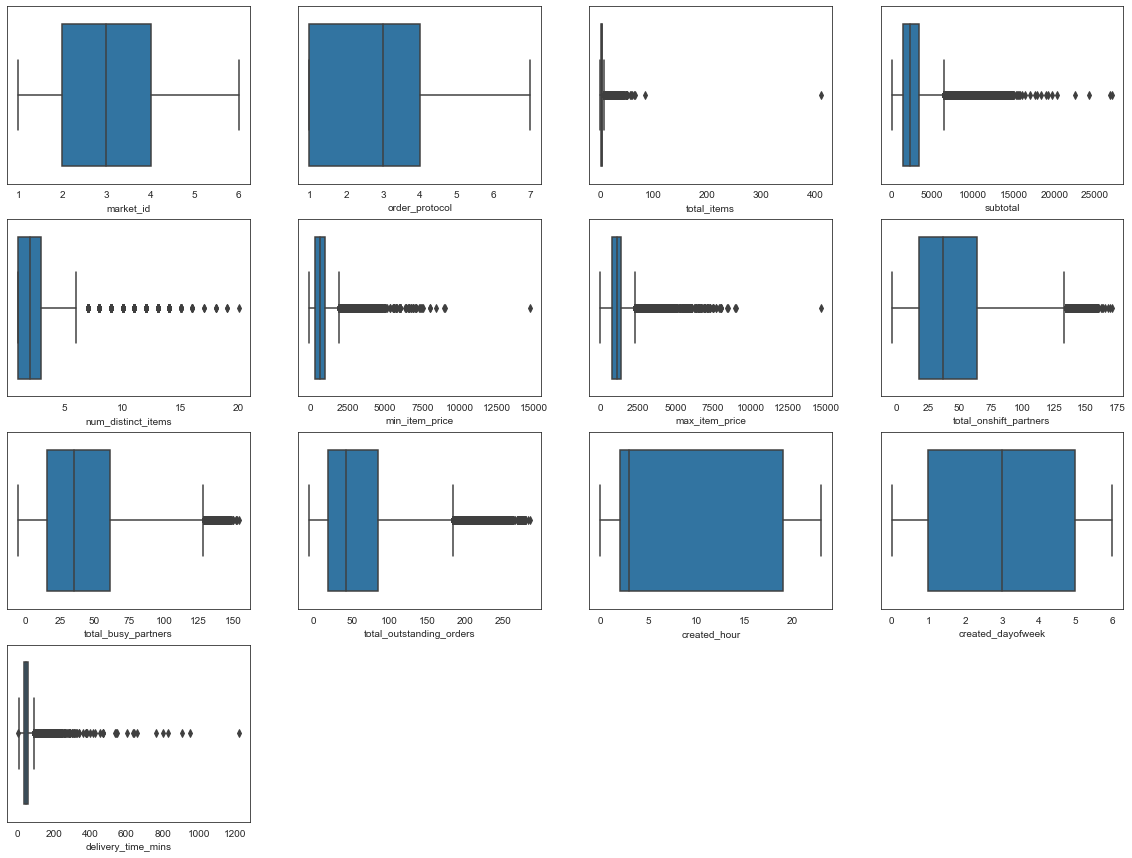

In [90]:
plt.figure(figsize=(20,15))
for c in range (0,len(num)):
    plt.subplot(4,4,c+1)
    sns.boxplot(data = df, x=num[c])

In [91]:
# This function is going to determine outliers based on IQR.
# Once outliers are identified, they will be removed from dataset.
def remove_outliers(data,column):
    first_quartile = data[column].quantile(0.25)
    third_quartile = data[column].quantile(0.75)
    IQR = third_quartile - first_quartile
    hg_boundry = third_quartile + (3*IQR)
    lw_boundry = first_quartile - (3*IQR)
    data.drop( data[(data[column] > hg_boundry) | (data[column] < lw_boundry) ].index, axis=0, inplace=True)

In [92]:
for i in range(len(num)):
    remove_outliers(df,num[i])

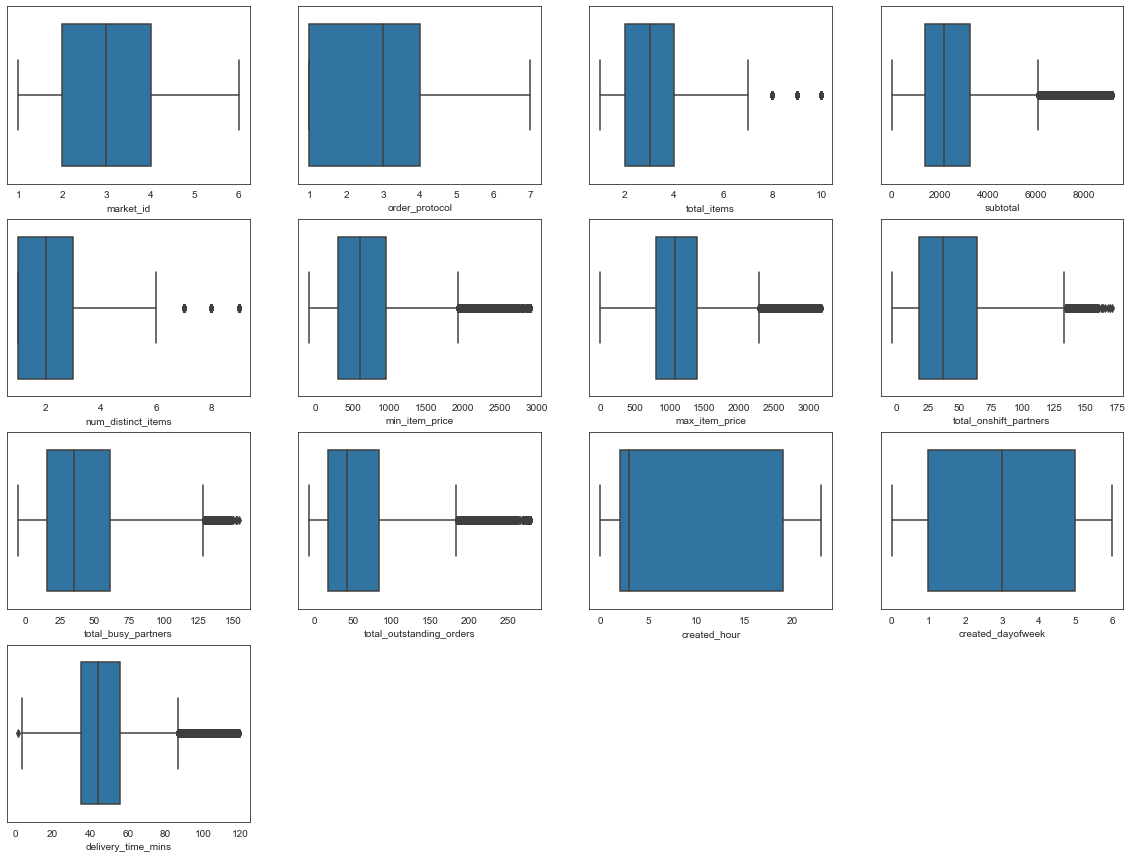

In [93]:
plt.figure(figsize=(20,15))
for c in range (0,len(num)):
    plt.subplot(4,4,c+1)
    sns.boxplot(data = df, x=num[c])

In [94]:
df.reset_index(inplace=True, drop=True)

In [95]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_dayofweek,delivery_time_mins
0,1.00,4,1.00,4,3441,4,557,1239,33.00,14.00,21.00,22,4,62.98
1,2.00,47,2.00,1,1900,1,1400,1400,1.00,2.00,2.00,21,1,67.07
2,3.00,4,1.00,1,1900,1,1900,1900,1.00,0.00,0.00,20,3,29.68
3,3.00,4,1.00,6,6900,5,600,1800,1.00,1.00,2.00,21,1,51.25
4,3.00,4,1.00,3,3900,3,1100,1600,6.00,6.00,9.00,2,6,39.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189565,1.00,28,4.00,3,1389,3,345,649,17.00,17.00,23.00,0,1,65.12
189566,1.00,28,4.00,6,3010,4,405,825,12.00,11.00,14.00,0,4,56.38
189567,1.00,28,4.00,5,1836,3,300,399,39.00,41.00,40.00,4,5,50.13
189568,1.00,59,1.00,1,1175,1,535,535,7.00,7.00,12.00,18,6,65.12


In [96]:
x = df.drop(['delivery_time_mins'], axis=1)
y=df['delivery_time_mins']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [97]:
baseline_regressor = RandomForestRegressor(random_state=0)
 
baseline_regressor.fit(X_train, y_train)

y_pred = baseline_regressor.predict(X_test)
print("RMSE : ", mse(y_test, y_pred)**0.5)
print("MAPE : ", mape(y_test, y_pred))

RMSE :  14.558861867958914
MAPE :  0.26194626377226565


The model performance somewhat improved and we can now move on to training a NN Regressor model.

In [98]:
fi = pd.DataFrame()
fi['features'] = df.columns[:-1]
fi['importance'] = baseline_regressor.feature_importances_
fi.sort_values(by='importance', ascending=False, inplace=True)
fi

,features,importance
4,subtotal,0.14
10,total_outstanding_orders,0.13
8,total_onshift_partners,0.11
7,max_item_price,0.10
11,created_hour,0.10
6,min_item_price,0.10
1,store_primary_category,0.08
9,total_busy_partners,0.07
12,created_dayofweek,0.06
2,order_protocol,0.04


<AxesSubplot:xlabel='importance', ylabel='features'>

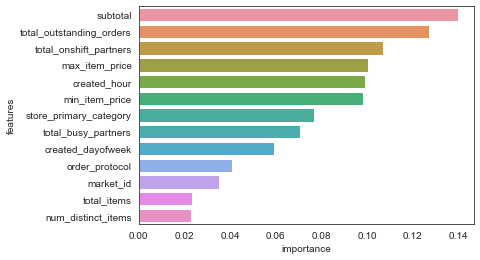

In [99]:
sns.barplot(y=fi['features'], x=fi['importance'], orient='h')

# Regression with neural networks

In [100]:
#Ann training
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError


from tensorflow.keras.metrics import  mean_absolute_percentage_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD, Adam

In [101]:
X_train.shape

(151656, 13)

In [102]:
model = Sequential()
model.add(Dense(13,  kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

In [103]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10)

In [104]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=200,  verbose=1, batch_size=8000,callbacks=[early_stop],validation_split=0.2)

Epoch 1/200
16/16 [==============================] - 2s 79ms/step - loss: 2363.4773 - mse: 2363.4773 - mae: 45.6505 - val_loss: 2061.3035 - val_mse: 2061.3035 - val_mae: 42.2296
Epoch 2/200
16/16 [==============================] - 1s 75ms/step - loss: 1260.6608 - mse: 1260.6608 - mae: 30.2604 - val_loss: 425.6478 - val_mse: 425.6478 - val_mae: 16.0781
Epoch 3/200
16/16 [==============================] - 1s 77ms/step - loss: 436.3710 - mse: 436.3710 - mae: 16.2234 - val_loss: 364.9533 - val_mse: 364.9533 - val_mae: 14.1983
Epoch 4/200
16/16 [==============================] - 1s 71ms/step - loss: 322.7722 - mse: 322.7722 - mae: 13.6096 - val_loss: 298.6429 - val_mse: 298.6429 - val_mae: 13.5602
Epoch 5/200
16/16 [==============================] - 1s 74ms/step - loss: 287.4789 - mse: 287.4789 - mae: 12.9518 - val_loss: 275.3645 - val_mse: 275.3645 - val_mae: 12.6432
Epoch 6/200
16/16 [==============================] - 1s 71ms/step - loss: 272.8983 - mse: 272.8983 - mae: 12.7131 - val_loss

Epoch 48/200
16/16 [==============================] - 1s 70ms/step - loss: 222.8128 - mse: 222.8128 - mae: 11.4056 - val_loss: 220.2162 - val_mse: 220.2162 - val_mae: 11.3712
Epoch 49/200
16/16 [==============================] - 1s 69ms/step - loss: 222.6230 - mse: 222.6230 - mae: 11.3966 - val_loss: 220.0992 - val_mse: 220.0992 - val_mae: 11.3346
Epoch 50/200
16/16 [==============================] - 1s 70ms/step - loss: 222.1767 - mse: 222.1767 - mae: 11.4041 - val_loss: 219.9680 - val_mse: 219.9680 - val_mae: 11.3271
Epoch 51/200
16/16 [==============================] - 1s 69ms/step - loss: 222.2408 - mse: 222.2408 - mae: 11.4003 - val_loss: 220.1049 - val_mse: 220.1049 - val_mae: 11.3164
Epoch 52/200
16/16 [==============================] - 1s 69ms/step - loss: 222.2505 - mse: 222.2505 - mae: 11.3886 - val_loss: 219.9022 - val_mse: 219.9022 - val_mae: 11.3023
Epoch 53/200
16/16 [==============================] - 1s 68ms/step - loss: 221.9019 - mse: 221.9019 - mae: 11.3931 - val_loss

Epoch 95/200
16/16 [==============================] - 1s 70ms/step - loss: 218.9162 - mse: 218.9162 - mae: 11.3100 - val_loss: 217.4973 - val_mse: 217.4973 - val_mae: 11.2460
Epoch 96/200
16/16 [==============================] - 1s 69ms/step - loss: 218.8576 - mse: 218.8576 - mae: 11.2981 - val_loss: 217.3690 - val_mse: 217.3690 - val_mae: 11.2481
Epoch 97/200
16/16 [==============================] - 1s 70ms/step - loss: 218.8076 - mse: 218.8076 - mae: 11.3007 - val_loss: 217.0862 - val_mse: 217.0862 - val_mae: 11.2750
Epoch 98/200
16/16 [==============================] - 1s 72ms/step - loss: 218.9754 - mse: 218.9754 - mae: 11.3148 - val_loss: 217.2823 - val_mse: 217.2823 - val_mae: 11.2258
Epoch 99/200
16/16 [==============================] - 1s 71ms/step - loss: 218.8558 - mse: 218.8558 - mae: 11.2991 - val_loss: 217.0454 - val_mse: 217.0454 - val_mae: 11.3044
Epoch 100/200
16/16 [==============================] - 1s 70ms/step - loss: 218.9168 - mse: 218.9168 - mae: 11.3115 - val_los

16/16 [==============================] - 1s 70ms/step - loss: 216.5058 - mse: 216.5058 - mae: 11.2334 - val_loss: 215.4325 - val_mse: 215.4325 - val_mae: 11.2401
Epoch 142/200
16/16 [==============================] - 1s 69ms/step - loss: 216.3724 - mse: 216.3724 - mae: 11.2372 - val_loss: 215.4078 - val_mse: 215.4078 - val_mae: 11.2008
Epoch 143/200
16/16 [==============================] - 1s 69ms/step - loss: 216.5455 - mse: 216.5455 - mae: 11.2383 - val_loss: 216.4816 - val_mse: 216.4816 - val_mae: 11.1523
Epoch 144/200
16/16 [==============================] - 1s 68ms/step - loss: 216.4694 - mse: 216.4694 - mae: 11.2301 - val_loss: 215.7853 - val_mse: 215.7853 - val_mae: 11.1572
Epoch 145/200
16/16 [==============================] - 1s 68ms/step - loss: 216.7202 - mse: 216.7202 - mae: 11.2440 - val_loss: 215.1840 - val_mse: 215.1840 - val_mae: 11.1927
Epoch 146/200
16/16 [==============================] - 1s 68ms/step - loss: 216.1857 - mse: 216.1857 - mae: 11.2348 - val_loss: 215.46

In [105]:
y_pred = model.predict(X_test)

1185/1185 [==============================] - 1s 1ms/step


In [106]:
print("RMSE : ", mse(y_test, y_pred)**0.5)
print("MAPE : ", mape(y_test, y_pred))

RMSE :  14.73705912334137
MAPE :  0.26173494420750826


# Model comparison

Random Forest:

RMSE :  14.558861867958914

MAPE :  0.26194626377226565

NN Regressor Model:

RMSE :  14.792099770338092

MAPE :  0.2583657635867709

# Leading Questions:

1. Defining the problem statements and where can this and modifications of this be used?

Ans: This can be extended in estimating delivery time of all e-commerce websites. 

2. List 3 functions the pandas datetime provides with one line explanation.

Ans: 
1. pd.dt.dayofweek: Returns the day of the week as an integer (Monday=0, Sunday=6) for each element in a pandas datetime object.
2. pd.dt.hour : Returns an integer representing the hour of the day (ranging from 0 to 23) for each element in a pandas datetime object.
3. pd.dt.strftime: Formats the pandas datetime object as a string according to a specified format string.

3. Short note on datetime, timedelta, time span (period)

Ans: Datetime refers to a specific point in time, usually expressed as a combination of a date and a time. In Python, the datetime module provides classes and functions for working with dates and times.

Timedelta is a class in the datetime module that represents a duration of time, such as the difference between two dates or times. Timedelta objects can be used to perform arithmetic with datetime objects, such as adding or subtracting time intervals.

Time span or period refers to a fixed length of time, such as a day, a week, or a month. In pandas, the Period class represents a fixed frequency interval of time, such as daily, weekly, or monthly. Period objects can be used to perform operations on time series data, such as aggregating data over fixed intervals.

4. Why do we need to check for outliers in our data?

Ans: It is important to check for outliers in our data because outliers can significantly affect the results of statistical analyses and machine learning models. Outliers are data points that are significantly different from other data points in the dataset, and can occur due to measurement errors, data entry errors, or genuine extreme values.

In machine learning, outliers can also affect the performance of models, particularly models that are sensitive to extreme values, such as linear regression or k-nearest neighbors. Outliers can distort the relationship between the input features and the target variable, leading to inaccurate predictions and reduced model performance.

5. Name 3 outlier removal methods?

Ans:
1. IQR method.
2. z-score method.
3. LOF method.

6. What classical machine learning methods can we use other than random forest for regression?

Ans: We can use other methods like GBDT, XgBoost, etc.

7. Why is scaling required for neural networks?

Ans: Scaling is required for neural networks to ensure that the input features are consistent and effective for gradient descent, activation functions, and regularization. Scaling can improve the stability, effectiveness, and generalization of neural networks.

8. Briefly explain your choice of optimizer.

Ans: We chose Adam optimizer because it is most widely used because it is a powerful and versatile optimization algorithm that can help to improve the convergence speed, accuracy, stability, and efficiency of deep learning models.

9. Which activation function did you use and why?

Ans: We used relu since it is a powerful and widely used activation function in neural networks that offers several advantages, including sparsity, non-linearity, simplicity, avoiding the vanishing gradient problem, and good performance in practice.

10. Why does a neural network perform well on a large dataset?

Ans: A neural network can perform well on a large dataset because it can learn more complex representations, handle noise and outliers, reduce overfitting, improve regularization, and improve optimization. This is why large datasets are often used in deep learning applications, such as image classification, speech recognition, and natural language processing.



